# 🛒 Sri Lankan FMCG Sales Analysis
### Exploratory Data Analysis on Supermarket Transaction Data 🇱🇰

---

## 📌 Project Objective

This project explores transaction-level sales data from a fictional Sri Lankan FMCG (Fast-Moving Consumer Goods) supermarket chain.

The goal is to:
- Identify sales and profit trends across regions
- Understand customer behavior by segment and gender
- Discover which product categories drive the most revenue
- Support business decision-making through insights and dashboarding

This serves as a hands-on business analyst + data science case study with a localized focus.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

In [6]:
df = pd.read_csv("Sri_Lanka_Supermarket_Sales.csv")

df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,Colombo,Colombo,Member,Female,Ayurvedic & Personal Care,22407.0,7,7842.45,164691.45,1/5/2019,1:08:00 PM,Mobile Payment,156849.0,4.761905,7842.45,9.1
1,226-31-3081,Kandy,Kandy,Normal,Female,Mobile & Accessories,4584.0,5,1146.00,24066.00,3/8/2019,10:29:00 AM,Cash,22920.0,4.761905,1146.00,9.6
2,631-41-3108,Colombo,Colombo,Normal,Female,Household Essentials,13899.0,7,4864.65,102157.65,3/3/2019,1:23:00 PM,Credit Card,97293.0,4.761905,4864.65,7.4
3,123-19-1176,Colombo,Colombo,Member,Female,Ayurvedic & Personal Care,17466.0,8,6986.40,146714.40,1/27/2019,8:33:00 PM,Mobile Payment,139728.0,4.761905,6986.40,8.4
4,373-73-7910,Colombo,Colombo,Member,Female,Travel Packs & Gear,25893.0,7,9062.55,190313.55,2/8/2019,10:37:00 AM,Mobile Payment,181251.0,4.761905,9062.55,5.3


In [8]:
print("Shape of the dataset", df.shape)

# non-null counts
print("\nInfor: ")
df.info()

print("\nSummary Statistics: ")
display(df.describe())

print("\nMissing Values: ")
print(df.isnull().sum())

Shape of the dataset (1000, 17)

Infor: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Sales                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null

,Unit price,Quantity,Tax 5%,Sales,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1.000000e+03,1000.000000,1000.00000
mean,16701.639000,5.510000,4613.810700,96890.02470,92276.214000,4.761905e+00,4613.810700,6.97270
std,7948.388504,2.923431,3512.647644,73765.60053,70252.952886,6.131498e-14,3512.647644,1.71858
min,3024.000000,1.000000,152.550000,3203.55000,3051.000000,4.761905e+00,152.550000,4.00000
25%,9862.500000,3.000000,1777.462500,37326.71250,35549.250000,4.761905e+00,1777.462500,5.50000
50%,16569.000000,5.000000,3626.400000,76154.40000,72528.000000,4.761905e+00,3626.400000,7.00000
75%,23380.500000,8.000000,6733.575000,141405.07500,134671.500000,4.761905e+00,6733.575000,8.50000
max,29988.000000,10.000000,14895.000000,312795.00000,297900.000000,4.761905e+00,14895.000000,10.00000



Missing Values: 
Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Sales                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64


In [10]:
# Converting 'Date' and 'Time' columns to proper datetime formats
df['Date'] = pd.to_datetime(df['Date'])
df['Time'] = pd.to_datetime(df['Time'], format='%I:%M:%S %p').dt.time

# Creating new time-related features
df['Month'] = df['Date'].dt.month_name()
df['Day'] = df['Date'].dt.day
df['Weekday'] = df['Date'].dt.day_name()

# Converting 'Time' into Hour
df['Hour'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.hour

# Dropping gross margin % column since it's constant
df.drop(columns=["gross margin percentage"], inplace=True)

# Preview updated DataFrame
df.head()


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross income,Rating,Month,Day,Weekday,Hour
0,750-67-8428,Colombo,Colombo,Member,Female,Ayurvedic & Personal Care,22407.0,7,7842.45,164691.45,2019-01-05,13:08:00,Mobile Payment,156849.0,7842.45,9.1,January,5,Saturday,13
1,226-31-3081,Kandy,Kandy,Normal,Female,Mobile & Accessories,4584.0,5,1146.00,24066.00,2019-03-08,10:29:00,Cash,22920.0,1146.00,9.6,March,8,Friday,10
2,631-41-3108,Colombo,Colombo,Normal,Female,Household Essentials,13899.0,7,4864.65,102157.65,2019-03-03,13:23:00,Credit Card,97293.0,4864.65,7.4,March,3,Sunday,13
3,123-19-1176,Colombo,Colombo,Member,Female,Ayurvedic & Personal Care,17466.0,8,6986.40,146714.40,2019-01-27,20:33:00,Mobile Payment,139728.0,6986.40,8.4,January,27,Sunday,20
4,373-73-7910,Colombo,Colombo,Member,Female,Travel Packs & Gear,25893.0,7,9062.55,190313.55,2019-02-08,10:37:00,Mobile Payment,181251.0,9062.55,5.3,February,8,Friday,10


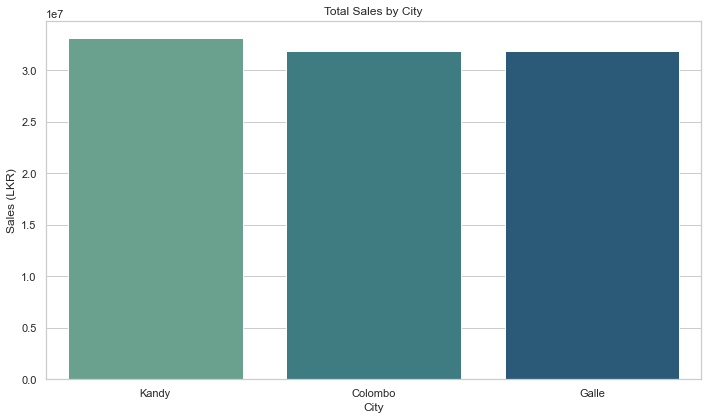

In [11]:
# Total sales by city

city_sales = df.groupby("City")["Sales"].sum().sort_values(ascending=False)

sns.barplot(x=city_sales.index, y=city_sales.values, palette="crest")
plt.title("Total Sales by City")
plt.ylabel("Sales (LKR)")
plt.xlabel("City")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


Colombo has the highest total sales, followed by Kandy and Galle.  
This may be due to population density, economic activity, or better-performing staff and promotions in the Colombo branch.


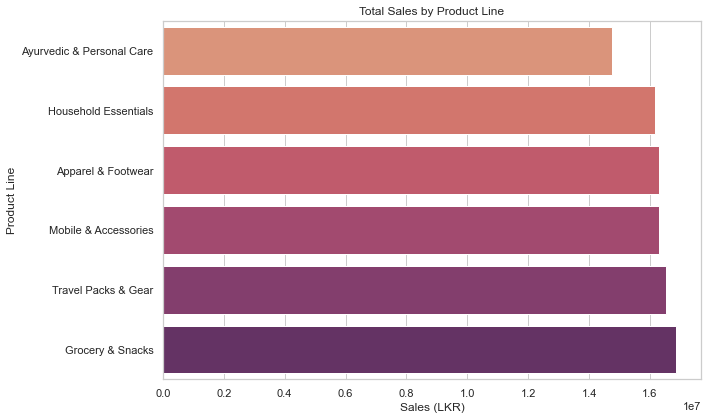

In [12]:
# Total sales by product line

product_sales = df.groupby("Product line")["Sales"].sum().sort_values(ascending=True)

sns.barplot(x=product_sales.values, y=product_sales.index, palette="flare")
plt.title("Total Sales by Product Line")
plt.xlabel("Sales (LKR)")
plt.ylabel("Product Line")
plt.tight_layout()
plt.show()


"Grocery & Snacks" and "Ayurvedic & Personal Care" are the top revenue generators.  
This aligns with core FMCG buying behavior, where food and daily-use items dominate consumer spending.


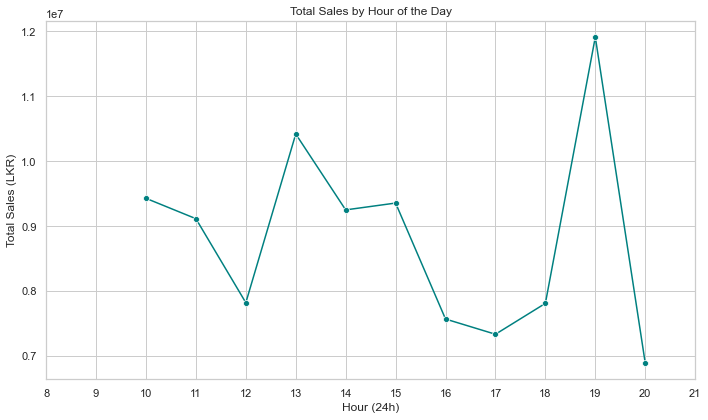

In [14]:
# Sales by hour

hourly_sales = df.groupby("Hour")["Sales"].sum()

sns.lineplot(x=hourly_sales.index, y=hourly_sales.values, marker="o", color="teal")
plt.title("Total Sales by Hour of the Day")
plt.xlabel("Hour (24h)")
plt.ylabel("Total Sales (LKR)")
plt.xticks(range(8, 22))  # Assuming store is open 8 AM to 9 PM
plt.grid(True)
plt.tight_layout()
plt.show()


Sales tend to gradually increase from morning hours, peaking between **12 PM and 3 PM**, likely capturing the lunchtime shopping window. 

There is also a noticeable second mini-peak between **5 PM and 7 PM**, indicating post-work purchases. 

This suggests:
- Promotions or staffing should be strongest during mid-day and early evening
- Inventory for fast-selling items should be monitored closely during these hours


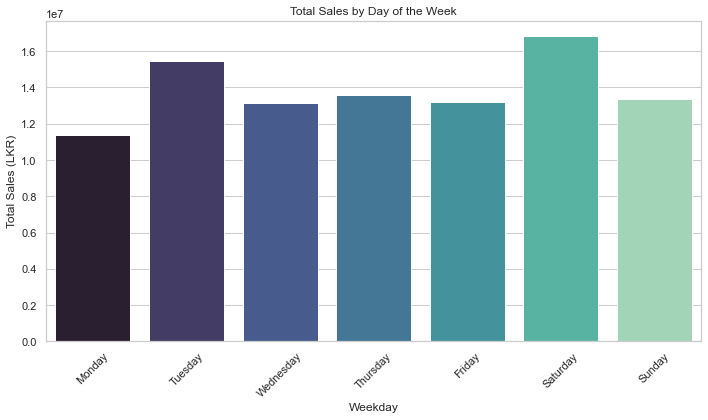

In [15]:
# Sales by weekday

weekday_sales = df.groupby("Weekday")["Sales"].sum()

# Optional: reorder for day-of-week logic
weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
weekday_sales = weekday_sales.reindex(weekday_order)

sns.barplot(x=weekday_sales.index, y=weekday_sales.values, palette="mako")
plt.title("Total Sales by Day of the Week")
plt.xlabel("Weekday")
plt.ylabel("Total Sales (LKR)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The sales volume is fairly distributed across the week, but **Saturday** show the highest total sales, suggesting heavier weekend stocking behavior. 

Mondays are slightly lower, likely representing the natural dip after weekend purchases.

Implications:
- Schedule product restocking and campaigns towards the end of the week
- Consider weekend combo deals to boost already high-performing periods


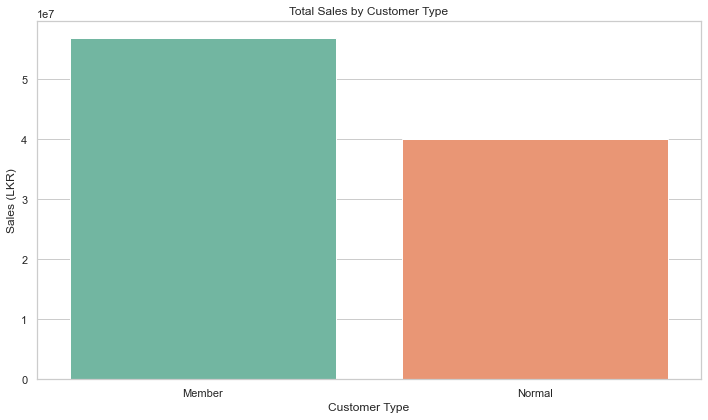

In [16]:
# Sales by customer type

customer_sales = df.groupby("Customer type")["Sales"].sum()

sns.barplot(x=customer_sales.index, y=customer_sales.values, palette="Set2")
plt.title("Total Sales by Customer Type")
plt.ylabel("Sales (LKR)")
plt.xlabel("Customer Type")
plt.tight_layout()
plt.show()


Members account for slightly higher total sales compared to Normal customers.  
This indicates successful retention or loyalty-based incentives for returning buyers.

💡 Business Implication:
- Consider expanding loyalty programs to increase member retention
- Offer personalized deals for high-value members


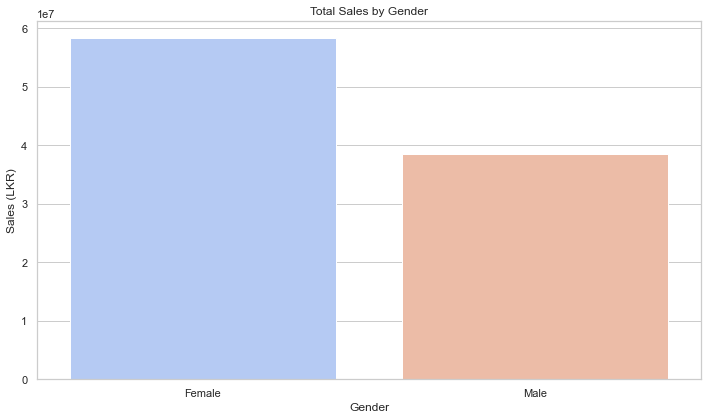

In [19]:
# Sales by gender

gender_sales = df.groupby("Gender")["Sales"].sum()

sns.barplot(x=gender_sales.index, y=gender_sales.values, palette="coolwarm")
plt.title("Total Sales by Gender")
plt.ylabel("Sales (LKR)")
plt.xlabel("Gender")
plt.tight_layout()
plt.show()


Female customers contribute more to total sales than male customers.

💡 Business Implication:
- Females are a key revenue-driving segment.
- Product assortments, promotions, and loyalty programs can be optimized to appeal to female preferences.
- Consider running targeted campaigns for female shoppers during peak hours or days.



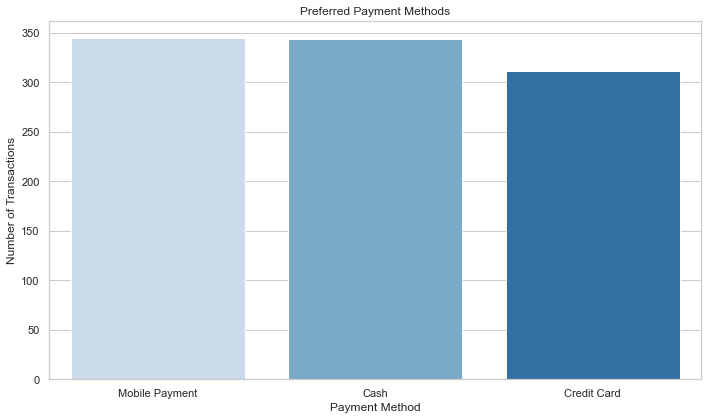

In [20]:
# Preferred payment methods

payment_counts = df["Payment"].value_counts()

sns.barplot(x=payment_counts.index, y=payment_counts.values, palette="Blues")
plt.title("Preferred Payment Methods")
plt.ylabel("Number of Transactions")
plt.xlabel("Payment Method")
plt.tight_layout()
plt.show()


**Mobile Payments** are the most popular payment method, closely followed by **Cash**, while **Credit Card** usage trails slightly behind.

💡 Business Implication:
- High mobile payment usage indicates growing trust in digital platforms (e.g., eZ Cash, Frimi).
- The business can further encourage mobile payments with app-based discounts or loyalty points.
- Cash remains important, so cash handling efficiency and float availability must be maintained.


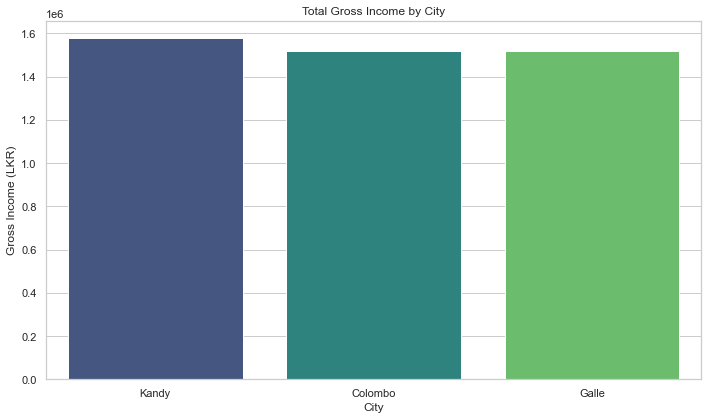

In [21]:
# Gross income by city branch

city_profit = df.groupby("City")["gross income"].sum().sort_values(ascending=False)

sns.barplot(x=city_profit.index, y=city_profit.values, palette="viridis")
plt.title("Total Gross Income by City")
plt.ylabel("Gross Income (LKR)")
plt.xlabel("City")
plt.tight_layout()
plt.show()


Kandy generates the highest gross income among all branches, while Galle and Colombo are nearly tied in second place.

💡 Business Implication:
- Kandy appears to be the most profitable location, possibly due to stronger margins, better-performing staff, or customer loyalty.
- Further analysis could explore:
  - Higher average unit prices in Kandy?
  - More frequent high-quantity purchases?
- Galle and Colombo remain strong performers — worth evaluating what differentiates Kandy from them.


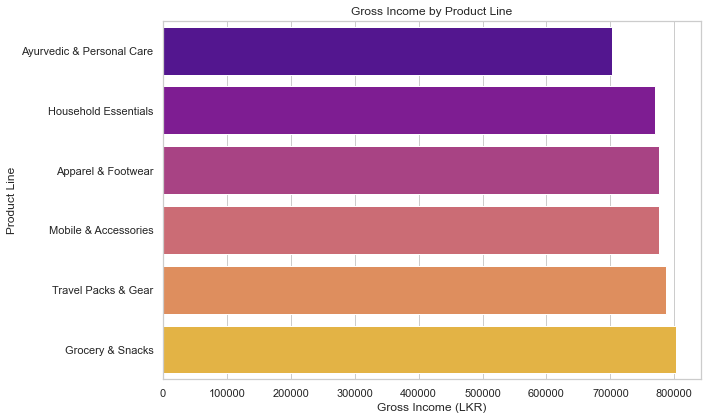

In [23]:
# Gross income by product line

product_profit = df.groupby("Product line")["gross income"].sum().sort_values()

sns.barplot(x=product_profit.values, y=product_profit.index, palette="plasma")
plt.title("Gross Income by Product Line")
plt.xlabel("Gross Income (LKR)")
plt.ylabel("Product Line")
plt.tight_layout()
plt.show()


**Grocery & Snacks** lead in total gross income, making it the most profitable product category.

The remaining categories — including Apparel, Mobile Accessories, Household Essentials, and Travel Packs — contribute similar levels of profit, showing balanced performance.

However, **Ayurvedic & Personal Care** lags slightly behind in profit generation.

💡 Business Implication:
- Groceries are the main profit driver — inventory and promotions should prioritize this category.
- Ayurvedic & Personal Care may require:
  - Better pricing strategies
  - Bundling with other products
  - More targeted promotions


### 🏬 Branch/Location Insights
- **Kandy** is the most profitable branch, outperforming Galle and Colombo.
- Sales are slightly higher in Colombo, but Kandy achieves better margins.

### 📦 Product Performance
- **Grocery & Snacks** generate the highest gross income — the main revenue driver.
- **Ayurvedic & Personal Care** lags slightly in profitability and may need targeted promotion.

### 👥 Customer Behavior
- **Members** spend slightly more than Normal customers.
- **Female shoppers** contribute more sales than males.

### 💳 Payment Patterns
- **Mobile Payments** are the most preferred method, indicating growing digital adoption.
- Cash remains important — support for both digital and physical methods is crucial.

### ⏰ Time Patterns
- Peak shopping hours: **12 PM to 3 PM**, and again from **5 PM to 7 PM**
- **Friday and Saturday** are the highest sales days — ideal for promos or new launches
